In [1]:
%reload_ext autoreload
%autoreload 2 

In [2]:
from aqua.diagnostics.ocean_stratification.stratification import Stratification
from aqua.diagnostics.ocean_stratification import PlotStratification
from aqua.diagnostics.ocean_stratification import PlotMLD


/home/bsc/bsc032946/.conda/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


# Startification Plot

In [14]:
strat = Stratification(
    catalog='mn5-phase2',
    model='IFS-NEMO',
    exp='control-1990-freeze',
    source='lra-r100-monthly',
    startdate='01-01-1991',
    enddate='31-05-1992',
    loglevel='DEBUG'
)


In [15]:
strat.run(
    dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = False,
    climatology = "January",
    )

2025-10-30 18:18:37 :: Stratification :: INFO     -> Starting stratification diagnostic run.
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/bsc/bsc032946/.aqua
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Configuration file found in /home/bsc/bsc032946/.aqua/config-aqua.yaml
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Available catalogs are ['mn5-phase2']
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Default catalog will be mn5-phase2
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Catalog file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Machine file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/machine.yaml
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to MN5
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to MN5
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Browsing catalog mn5-ph

2025-10-30 18:18:37 :: ConfigPath :: INFO     -> IFS-NEMO_control-1990-freeze_lra-r100-monthly triplet found in in mn5-phase2!
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Final catalog to be used is mn5-phase2
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Catalog file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> Machine file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/machine.yaml
2025-10-30 18:18:37 :: ConfigPath :: DEBUG    -> No paths found in the main configuration file {'mn5-phase2': {'catalog': 'mn5-phase2', 'machine': 'MN5', 'reader': {'catalog': '/home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml', 'machine': '/home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/machine.yaml', 'fixer': '/home/bsc/bsc032946/.aqua/fixes', 'regrid': '/home/bsc/bsc032946/.aqua/grids'}, 'options': {'style': 'aqua'}}}
2025-10-30 18:18:37 :: yaml :: DEBUG    -> Creating a new dictionary
2025-10-30 18:18:37 :: yaml :: DEBUG

2025-10-30 18:19:20 :: PlotStratification :: DEBUG    -> Variables in data: ['thetao', 'so', 'rho']
2025-10-30 18:19:20 :: OutputSaver :: DEBUG    -> Complete initialization with parameters: {'diagnostic': 'ocean_stratification', 'catalog': 'mn5-phase2', 'model': 'IFS-NEMO', 'exp': 'control-1990-freeze', 'realization': 'r1', 'catalog_ref': None, 'model_ref': None, 'exp_ref': None}
2025-10-30 18:19:20 :: PlotStratification :: DEBUG    -> Suptitle set to: Stratification January climatology mn5-phase2 IFS-NEMO control-1990-freeze Labrador Sea
2025-10-30 18:19:20 :: PlotStratification :: DEBUG    -> Title list set to: ['None None None', 'None None None', 'None None None']
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/bsc/bsc032946/.aqua
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Configuration file found in /home/bsc/bsc032946/.aqua/config-aqua.yaml
2025-10-30 18:19:20 

2025-10-30 18:19:20 :: plot_vertical_line :: DEBUG    -> Plotting reference data
2025-10-30 18:19:20 :: plot_vertical_line :: DEBUG    -> Returning figure and axes
2025-10-30 18:19:20 :: plot_multi_hovmoller :: DEBUG    -> Creating subplot for variable so at (0, 1)
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/bsc/bsc032946/.aqua
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Configuration file found in /home/bsc/bsc032946/.aqua/config-aqua.yaml
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Catalog found in /home/bsc/bsc032946/.aqua/config-aqua.yaml file are mn5-phase2
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Available catalogs are ['mn5-phase2']
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Default catalog will be mn5-phase2
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Catalog file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml
2025-10-30 18:19:20 :: ConfigPath :: DEBUG    -> Machine file is /home/bsc/bsc032946/.aq

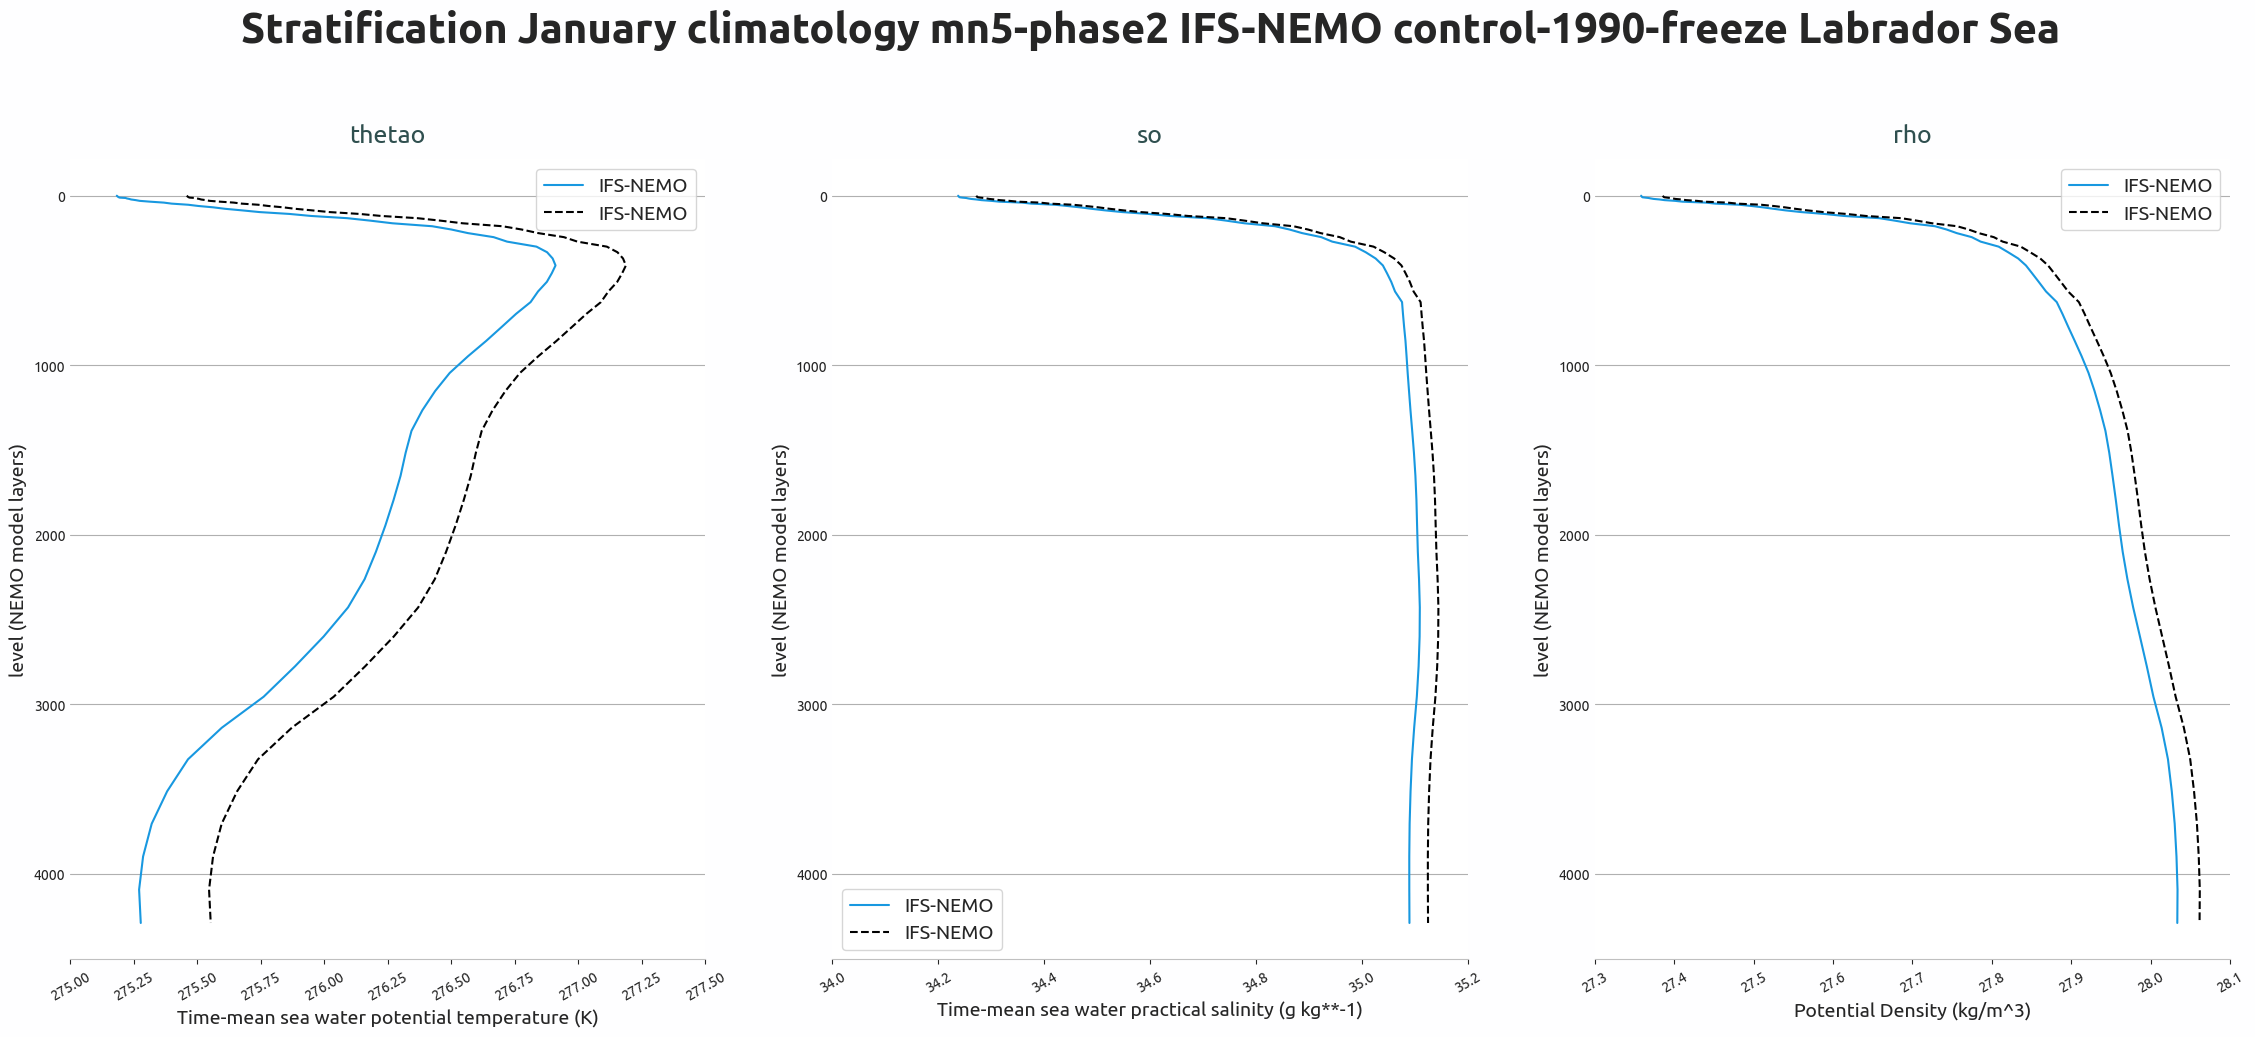

In [16]:
ps = PlotStratification(data=strat.data[['thetao', 'so', 'rho']],
                        obs=strat.data[['thetao', 'so', 'rho']]*1.001, # just to have different data for obs
                        loglevel='DEBUG',
                        )
ps.plot_stratification()

# Mixed layer depth Plot

In [17]:
mld_init = Stratification(
    catalog='mn5-phase2',
    model='IFS-NEMO',
    exp='control-1990-freeze',
    source='lra-r100-monthly',
    startdate='01-01-1991',
    enddate='31-05-1992',
    loglevel='DEBUG'
)


In [20]:
mld_init.run(
    # dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = True,
    climatology = "January",
    )

2025-10-30 18:20:56 :: Stratification :: INFO     -> Starting stratification diagnostic run.
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/bsc/bsc032946/.aqua
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Configuration file found in /home/bsc/bsc032946/.aqua/config-aqua.yaml
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Available catalogs are ['mn5-phase2']
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Default catalog will be mn5-phase2
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Catalog file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Machine file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/machine.yaml
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to MN5
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Machine found in configuration file, se

2025-10-30 18:20:56 :: ConfigPath :: INFO     -> IFS-NEMO_control-1990-freeze_lra-r100-monthly triplet found in in mn5-phase2!
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Final catalog to be used is mn5-phase2
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Catalog file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> Machine file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/machine.yaml
2025-10-30 18:20:56 :: ConfigPath :: DEBUG    -> No paths found in the main configuration file {'mn5-phase2': {'catalog': 'mn5-phase2', 'machine': 'MN5', 'reader': {'catalog': '/home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml', 'machine': '/home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/machine.yaml', 'fixer': '/home/bsc/bsc032946/.aqua/fixes', 'regrid': '/home/bsc/bsc032946/.aqua/grids'}, 'options': {'style': 'aqua'}}}
2025-10-30 18:20:56 :: yaml :: DEBUG    -> Creating a new dictionary
2025-10-30 18:20:56 :: yaml :: DEBUG

2025-10-30 18:23:44 :: PlotStratification :: DEBUG    -> Variables in data: ['mld']
2025-10-30 18:23:44 :: OutputSaver :: DEBUG    -> Complete initialization with parameters: {'diagnostic': 'ocean_stratification', 'catalog': 'mn5-phase2', 'model': 'IFS-NEMO', 'exp': 'control-1990-freeze', 'realization': 'r1', 'catalog_ref': None, 'model_ref': None, 'exp_ref': None}
2025-10-30 18:23:44 :: PlotStratification :: DEBUG    -> Suptitle set to: MLD January climatology mn5-phase2 IFS-NEMO control-1990-freeze Labrador Sea
2025-10-30 18:23:44 :: PlotStratification :: DEBUG    -> Title list set to: ['mn5-phase2 IFS-NEMO control-1990-freeze', 'mn5-phase2 IFS-NEMO control-1990-freeze']
2025-10-30 18:23:44 :: cbar get label :: DEBUG    -> Updating the log_level to DEBUG
2025-10-30 18:23:44 :: cbar get label :: DEBUG    -> Using Mixed Layer Depth as colorbar label
2025-10-30 18:23:44 :: cbar get label :: DEBUG    -> Adding units to colorbar label
2025-10-30 18:23:44 :: PlotStratification :: DEBUG    

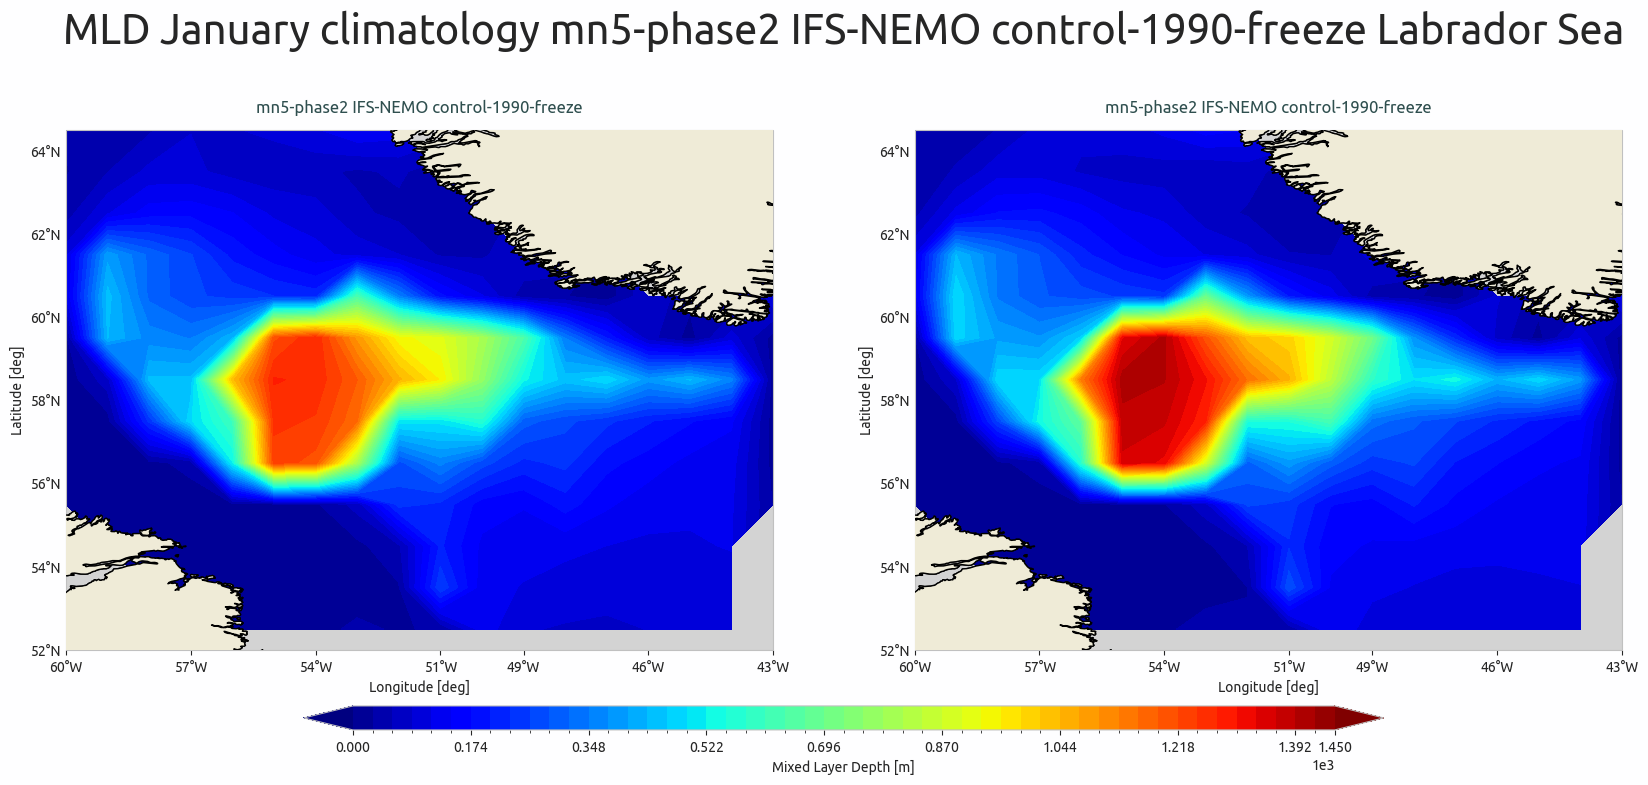

In [24]:
ps = PlotMLD(data=mld_init.data[['mld']],
              obs=mld_init.data[['mld']]*1.1,
              loglevel='DEBUG',
              )
ps.plot_mld()